In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
class Map(object): 
    def __init__(self,size,learning_rate=0.1, neighborhood_radius=0.01):
        self.size = size
        self.learning_rate = learning_rate
        self.neighborhood_radius = neighborhood_radius
        self.neurons = np.random.uniform(0,1,(size,size,2))
        
    def find_bmu(self, input_node): #find best matching unit
        min_distance = np.inf
        bum_position = ()
        for row in xrange(self.size):
            for col in xrange(self.size):
                distance = Euclidean_distance(self.neurons[row,col], input_node)

                if distance < min_distance: 
                    min_distance = distance
                    bum_position =(row,col)

        return bum_position, min_distance
    
    
    def weight_update(self,input_node,bmu_position,new_radius, new_learning_rate): 
        for row in xrange(self.size):
            for col in xrange(self.size):
                current_position = (row,col)
                d = Euclidean_distance(self.neurons[bmu_position], self.neurons[current_position])
                h = self.neighborhood_function(d, new_radius)
                delta_weight = input_node - self.neurons[current_position]
                new_weight = self.neurons[current_position] + new_learning_rate*h*delta_weight
                self.neurons[current_position] = new_weight
    
    def learning_rate_update(self,turn,iteration):
        new_learning_rate = self.learning_rate * np.exp(-turn/float(iteration))
        return new_learning_rate
    
    def neighborhood_function(self, d, new_radius):
        h = np.exp(-np.square(float(d))/(2*np.square(new_radius)))
        return h
    
    def radius_update(self, turn, iteration):
        new_radius = self.neighborhood_radius * np.exp(-turn*np.log10(self.neighborhood_radius)/iteration)
        return new_radius
    
    def Kohonen_learning(self, training_set, iteration=1000):
        training_set.plot(kind='scatter',x='x',y='y', c='yellow', alpha = 0.3)
        t = self.neurons.copy()
        t.resize(self.size*self.size,2)
        plt.scatter(t[:,0],t[:,1])
        plt.title("Initialisation")
        plt.show()
 
        train = np.array(training_set.iloc[:,:-1])
        
        for turn in xrange(iteration):
            for input_node in train: 
                bmu_position, d_bum = self.find_bmu(input_node)
                winning_node = self.neurons[bmu_position]
                new_radius = self.radius_update(turn+1, iteration) # turn + 1 to avoid 0
                new_learning_rate = self.learning_rate_update(turn,iteration)
                self.weight_update(input_node,bmu_position,new_radius,new_learning_rate)
            training_set.plot(kind='scatter',x='x',y='y', c='yellow', alpha=0.3)
            t = self.neurons.copy()
            t.resize(self.size*self.size,2)
            plt.scatter(t[:,0],t[:,1])
            plt.title("Iteration %d"%(turn + 1)) 
            plt.show()
            
        print "done"
        return self.neurons
        
        

In [5]:
def Euclidean_distance(pointA,pointB): 
    return np.linalg.norm(pointA-pointB)

#### Create dataframe

In [6]:
def str_to_float(df): 
    new_df = df.copy()
    return new_df.applymap(lambda x: float(x.replace(',','.')))

In [7]:
def z_score(df):
    new_df = df.copy()
    new_df.x = (new_df.x - new_df.x.mean())/new_df.x.std(ddof=0)
    new_df.y = (new_df.y - new_df.y.mean())/new_df.y.std(ddof=0)
    return new_df

In [8]:
def normalize(df):
    new_df = df.copy()
    new_df.x = (new_df.x - new_df.x.min())/(new_df.x.max() - new_df.x.min())
    new_df.y = (new_df.y - new_df.y.min())/(new_df.y.max() - new_df.y.min())
    return new_df

In [9]:
def create_df(file_name):
    df = pd.read_csv(file_name,sep=' ',header=None)
    df.columns = ['x','y','Value']
    df = str_to_float(df)
    #df = z_score(df) 
    df = normalize(df)
    binary_code = [np.sign(x-.5) for x in df.Value] 
    df['Class'] = binary_code 
    df = df.drop('Value',1)
    return df

In [11]:
df = create_df(file_name="donneespb4.txt")
df.head()

,x,y,Class
0,0.745443,0.178058,1
1,0.038718,0.298100,-1
2,0.024899,0.335908,-1
3,0.040403,0.556396,-1
4,0.406911,0.876045,1


In [12]:
df.describe()

,x,y,Class
count,3000.000000,3000.000000,3000.000000
mean,0.383886,0.495651,-0.452000
std,0.339727,0.250649,0.892167
min,0.000000,0.000000,-1.000000
25%,0.053838,0.286890,-1.000000
50%,0.266477,0.490487,-1.000000
75%,0.708473,0.713925,1.000000
max,1.000000,1.000000,1.000000


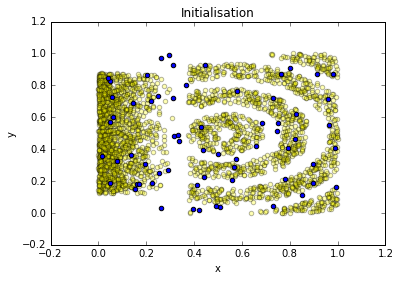

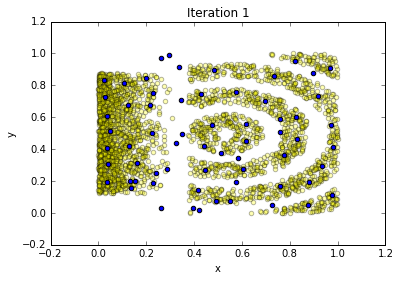

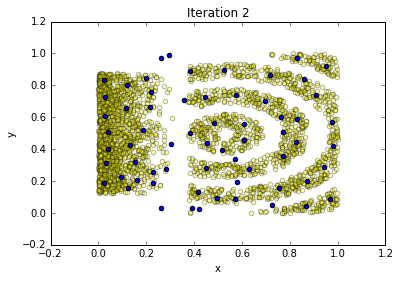

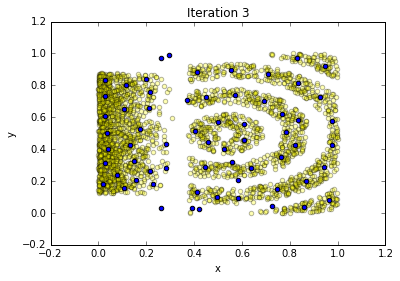

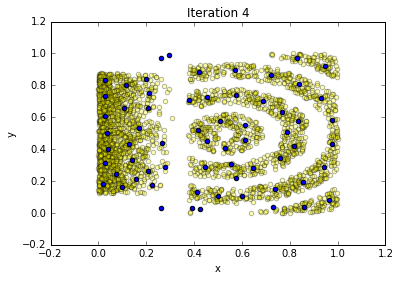

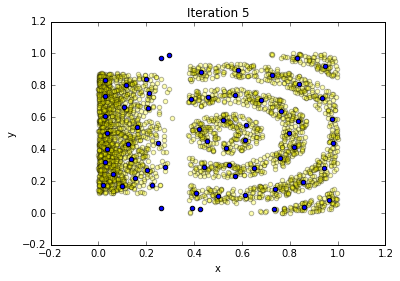

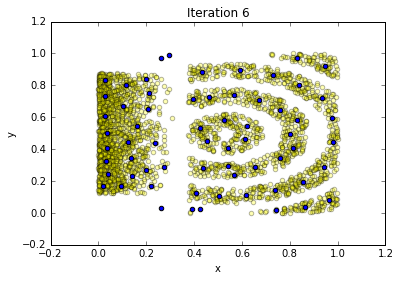

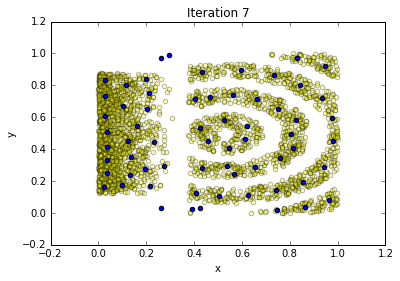

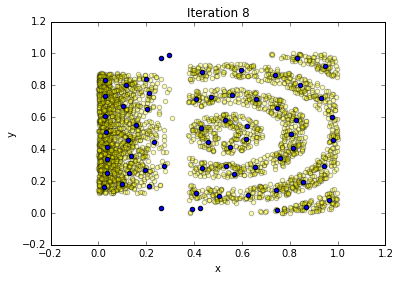

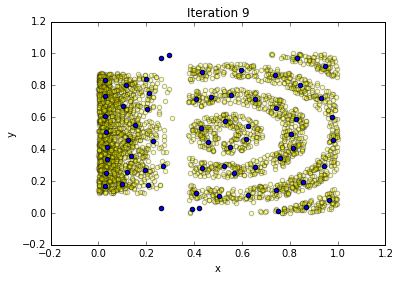

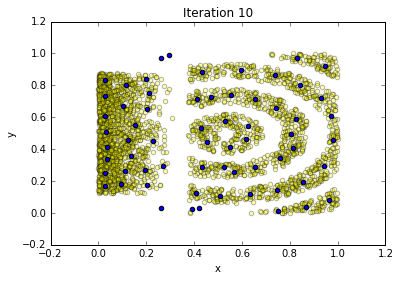

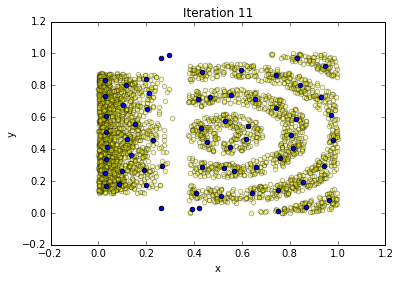

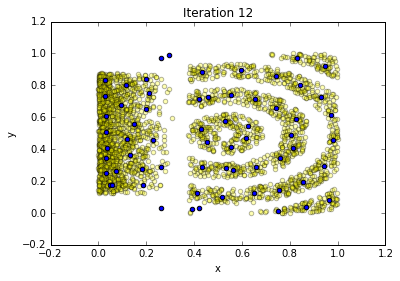

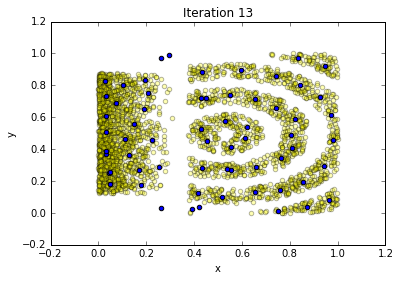

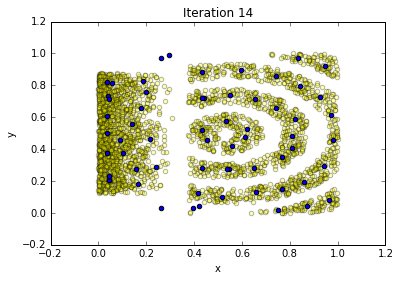

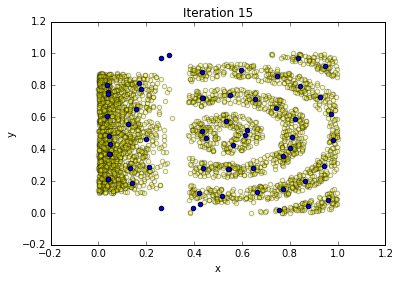

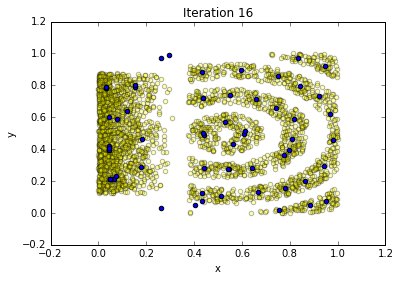

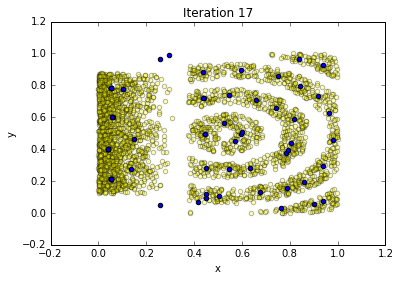

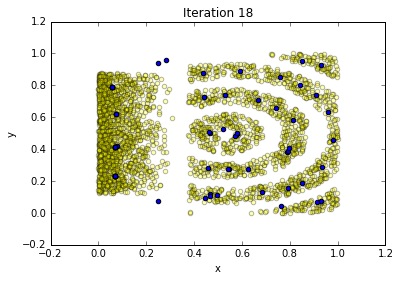

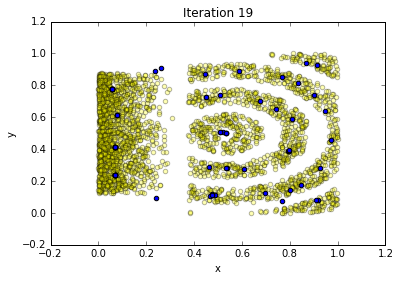

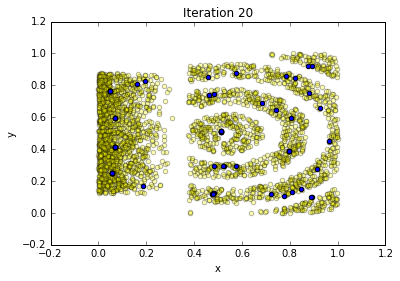

done


In [13]:
m = Map(size = 8, learning_rate = 0.04)
result = m.Kohonen_learning(training_set=df.iloc[:,], iteration=20)

In [14]:
result

array([[[ 0.78293138,  0.85932573],
        [ 0.5769016 ,  0.29149546],
        [ 0.05617212,  0.24960718],
        [ 0.89524019,  0.92277731],
        [ 0.05617211,  0.24960662],
        [ 0.51419768,  0.51055694],
        [ 0.87519467,  0.92141017],
        [ 0.48214291,  0.74860586]],

       [[ 0.5132494 ,  0.51085384],
        [ 0.68482677,  0.69083303],
        [ 0.07019209,  0.41095086],
        [ 0.04801172,  0.76555459],
        [ 0.06972695,  0.59552536],
        [ 0.8084399 ,  0.12956931],
        [ 0.80712212,  0.59302803],
        [ 0.07018531,  0.41099378]],

       [[ 0.05618214,  0.24964131],
        [ 0.91476831,  0.2785602 ],
        [ 0.05618181,  0.2496391 ],
        [ 0.51409891,  0.51051111],
        [ 0.72284107,  0.11837316],
        [ 0.45773788,  0.85049804],
        [ 0.51241388,  0.51085028],
        [ 0.52566728,  0.29648671]],

       [[ 0.0701836 ,  0.41097875],
        [ 0.18595649,  0.16975408],
        [ 0.77715635,  0.10827394],
        [ 0.52302183, 

In [15]:
from sklearn import cluster

In [21]:
kmeans = cluster.KMeans(n_clusters = 6)

t = result.copy()

t.resize(8*8,2)

kmeans.fit(t)
predicted_cluster = kmeans.predict(df[['x','y']])
labels = kmeans.labels_

df['Cluster'] = predicted_cluster
predicted_cluster = kmeans.predict(df[['x','y']])
df.head()


,x,y,Class,Cluster
0,0.745443,0.178058,1,2
1,0.038718,0.298100,-1,1
2,0.024899,0.335908,-1,1
3,0.040403,0.556396,-1,3
4,0.406911,0.876045,1,0


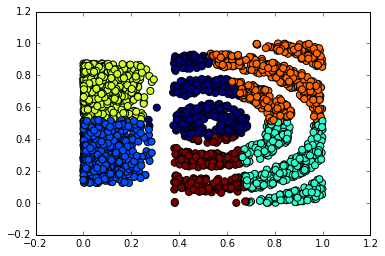

In [22]:
plt.scatter(df.x,df.y,c=df.Cluster, s=50)